In [311]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

%matplotlib inline

In [312]:
from tensorflow.examples.tutorials.mnist import input_data

In [313]:
mnist = input_data.read_data_sets("data/" ,one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [314]:
def random_var(shape):
    return tf.Variable(tf.truncated_normal(shape))

In [315]:
conv_strides = [1, 1, 1, 1]
pool_2by2 = [1, 2, 2, 1]
pool_1by1 = [1 , 1 , 1, 1]

In [316]:
def conv2d(x , shape):
    w = random_var(shape)
    b = random_var([shape[3]])
    return tf.nn.relu(tf.nn.conv2d(input=x , filter=w , strides=conv_strides , padding='SAME') + b)

In [317]:
def full_conn(x , num):
    input_size = int(x.get_shape()[1])
    w = random_var((input_size, num))
    b = random_var((1, num))
    return tf.matmul(x , w) + b

In [318]:
X = tf.placeholder(tf.float32 , shape=[None, 784])
Y = tf.placeholder(tf.float32 , shape=[None , 10])

In [319]:
x_img = tf.reshape(X , [-1 , 28 , 28 , 1])

In [264]:
cnn1 = conv2d(x_img , shape = [5, 5, 1 ,32])
pool1 = tf.nn.max_pool(cnn1 , ksize= pool_2by2 , strides= pool_2by2 , padding = 'SAME')

In [265]:
cnn2 = conv2d(pool1 , shape = [5, 5, 32 ,64])
pool2 = tf.nn.max_pool(cnn2 , ksize= pool_2by2 , strides= pool_2by2 , padding = 'SAME')

In [266]:
cnn3 = conv2d(pool2 , shape = [5, 5, 64 ,128])
pool3 = tf.nn.max_pool(cnn3 , ksize= pool_2by2 , strides= pool_2by2 , padding = 'SAME')

In [296]:
cnn4 = conv2d(pool3 , shape = [5, 5, 128 ,192])
pool4 = tf.nn.max_pool(cnn4 , ksize= pool_2by2 , strides= pool_2by2 , padding = 'SAME')

In [297]:
flat3 = tf.reshape(pool4 , [-1 , 2*2*192])
full_conn1 = tf.nn.relu(full_conn(flat3 , 768))

In [298]:
drop_p = tf.placeholder(tf.float32)
full_conn1_drop = tf.nn.dropout(x = full_conn1 , keep_prob= drop_p)

In [320]:
y_ = full_conn(full_conn1_drop , 10)

In [321]:
cross = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_ , labels=Y))

In [322]:
opt = tf.train.AdamOptimizer(learning_rate=0.00005)
exe = opt.minimize(cross)

In [323]:
init = tf.global_variables_initializer()

In [274]:
steps = 20000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = mnist.train.next_batch(50)
        
        sess.run(exe,feed_dict={X:batch_x,Y:batch_y,drop_p:0.6})
        if i%500 == 0:
            print('Iteration: {}'.format(i))

            matches = tf.equal(tf.argmax(y_,1),tf.argmax(Y,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print("Accuracy: ",sess.run(acc,feed_dict={X:mnist.validation.images,Y:mnist.validation.labels,drop_p:1.0}))
            print('\n')

Iteration: 0
Accuracy:  0.0978


Iteration: 500
Accuracy:  0.5818


Iteration: 1000
Accuracy:  0.7458


Iteration: 1500
Accuracy:  0.815


Iteration: 2000
Accuracy:  0.846


Iteration: 2500
Accuracy:  0.8696


Iteration: 3000
Accuracy:  0.888


Iteration: 3500
Accuracy:  0.898


Iteration: 4000
Accuracy:  0.9062


Iteration: 4500
Accuracy:  0.9134


Iteration: 5000
Accuracy:  0.9218


Iteration: 5500
Accuracy:  0.9244


Iteration: 6000
Accuracy:  0.9264


Iteration: 6500
Accuracy:  0.9328


Iteration: 7000
Accuracy:  0.9378


Iteration: 7500
Accuracy:  0.9378


Iteration: 8000
Accuracy:  0.9388


Iteration: 8500
Accuracy:  0.941


Iteration: 9000
Accuracy:  0.9438


Iteration: 9500
Accuracy:  0.9456


Iteration: 10000
Accuracy:  0.9462


Iteration: 10500
Accuracy:  0.9454


Iteration: 11000
Accuracy:  0.9444


Iteration: 11500
Accuracy:  0.9448


Iteration: 12000
Accuracy:  0.9464


Iteration: 12500
Accuracy:  0.9482


Iteration: 13000
Accuracy:  0.9502


Iteration: 13500
Accuracy:  0.

In [334]:
def Predict(N):
    sess = tf.InteractiveSession()
    z = sess.run(y_ , feed_dict={X:mnist.test.images[N].reshape((1 , 784)) ,drop_p:1.0})
    return "It's " + str(np.argmax(z))

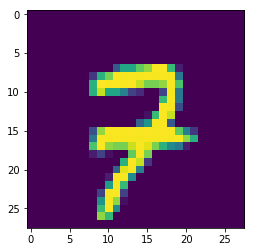

In [329]:
plt.imshow(mnist.test.images[144].reshape((28 , 28)))

In [333]:
Predict(144)

"It's 7"